In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [154]:
df = pd.read_csv('./CarPrice.csv')
df.head(n=10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [155]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [156]:
Car=[]
company=[]
for i in df['CarName']:
    company.append(i.split()[0])
    Car.append(''.join(i.split()[1:]))

In [157]:
df['Car']=Car

In [158]:
company

['alfa-romero',
 'alfa-romero',
 'alfa-romero',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'audi',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'bmw',
 'chevrolet',
 'chevrolet',
 'chevrolet',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'dodge',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'honda',
 'isuzu',
 'isuzu',
 'isuzu',
 'isuzu',
 'jaguar',
 'jaguar',
 'jaguar',
 'maxda',
 'maxda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'mazda',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'buick',
 'mercury',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'mitsubishi',
 'Nissan',
 'nissan',
 'nissan',


In [159]:
df['company']=company

In [160]:
df=df.drop(['CarName'],1)

C:\Users\samri\AppData\Local\Temp\ipykernel_12132\1687878640.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(['CarName'],1)


In [161]:
le=LabelEncoder()
ss=StandardScaler()
df['company']=le.fit_transform(df['company'])
df['Car']=le.fit_transform(df['Car'])
df['fueltype']=le.fit_transform(df['fueltype'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['doornumber']=le.fit_transform(df['doornumber'])
df['carbody']=le.fit_transform(df['carbody'])
df['drivewheel']=le.fit_transform(df['drivewheel'])
df['enginelocation']=le.fit_transform(df['enginelocation'])
df['enginetype']=le.fit_transform(df['enginetype'])
df['cylindernumber']=le.fit_transform(df['cylindernumber'])
df['fuelsystem']=le.fit_transform(df['fuelsystem'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car,company
0,1,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0,78,1
1,2,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0,122,1
2,3,1,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0,28,1
3,4,2,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0,1,2
4,5,2,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0,1,2


In [162]:
scaled_df = pd.DataFrame(ss.fit_transform(df), columns=df.columns)
original_df = pd.DataFrame(ss.inverse_transform(scaled_df), columns=df.columns)
original_df

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car,company
0,1.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548.0,0.0,2.0,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0,78.0,1.0
1,2.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,48.8,2548.0,0.0,2.0,130.0,5.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0,122.0,1.0
2,3.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,65.5,52.4,2823.0,5.0,3.0,152.0,5.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0,28.0,1.0
3,4.0,2.0,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,54.3,2337.0,3.0,2.0,109.0,5.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0,1.0,2.0
4,5.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,54.3,2824.0,3.0,1.0,136.0,5.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201.0,-1.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,2952.0,3.0,2.0,141.0,5.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0,5.0,26.0
201,202.0,-1.0,1.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.8,55.5,3049.0,3.0,2.0,141.0,5.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0,4.0,26.0
202,203.0,-1.0,1.0,0.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,3012.0,5.0,3.0,173.0,5.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0,6.0,26.0
203,204.0,-1.0,0.0,1.0,0.0,3.0,2.0,0.0,109.1,188.8,68.9,55.5,3217.0,3.0,3.0,145.0,3.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0,8.0,26.0


In [163]:
x=original_df.drop(['price'],axis=1)
y=original_df['price']

In [164]:
print('Xshape=',x.shape)
print('Yshape=',y.shape)

Xshape= (205, 26)
Yshape= (205,)


In [165]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,train_size=0.8)

In [166]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(Xtrain,Ytrain)
pred=model.predict(Xtest)
model.score(Xtest,Ytest)

0.8736831017118906

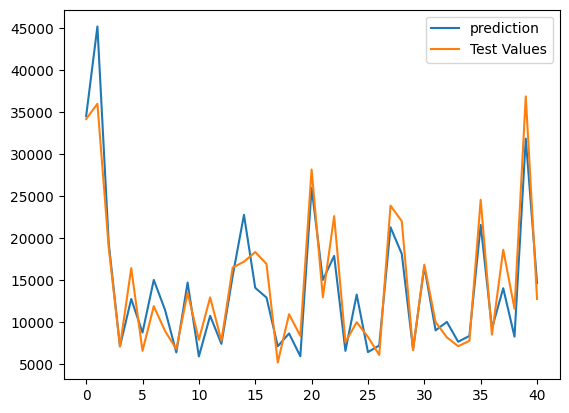

In [167]:
plt.plot(pred,label='prediction')
plt.plot(Ytest.values,label='Test Values')
plt.legend()
plt.show()

In [168]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(Xtrain,Ytrain)
pred=model.predict(Xtest)
model.score(Xtest,Ytest)

0.8893546211116635

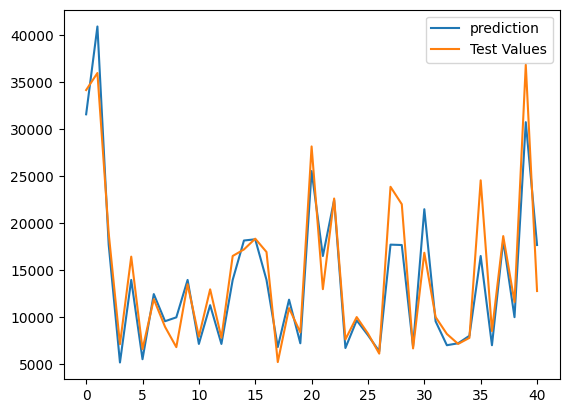

In [169]:
plt.plot(pred,label='prediction')
plt.plot(Ytest.values,label='Test Values')
plt.legend()
plt.show()

In [170]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(Xtrain,Ytrain)
pred=model.predict(Xtest)
model.score(Xtest,Ytest)

0.9026962858650998

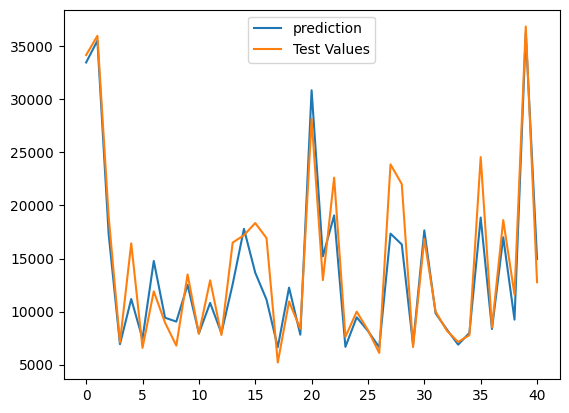

In [171]:
plt.plot(pred,label='prediction')
plt.plot(Ytest.values,label='Test Values')
plt.legend()
plt.show()